## Covid-19 Probability Detector

In [1]:
import pandas as pd

In [2]:
covid_data = pd.read_csv("data.csv")

In [3]:
covid_data.head()

,fever,bodyPain,age,runnyNose,diffBreathe,infectionProb
0,100.074002,1,70,0,0,0
1,100.891916,0,65,1,-1,1
2,98.178023,1,64,1,0,1
3,98.928377,0,80,0,-1,1
4,101.066774,1,26,1,1,0


In [4]:
covid_data.tail()

,fever,bodyPain,age,runnyNose,diffBreathe,infectionProb
3047,99.646850,1,91,0,-1,1
3048,98.573699,1,83,1,0,0
3049,101.474273,0,8,1,0,0
3050,100.512935,0,85,0,1,1
3051,101.483212,0,91,0,0,0


In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fever          3052 non-null   float64
 1   bodyPain       3052 non-null   int64  
 2   age            3052 non-null   int64  
 3   runnyNose      3052 non-null   int64  
 4   diffBreathe    3052 non-null   int64  
 5   infectionProb  3052 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 143.2 KB


In [6]:
covid_data.describe()

,fever,bodyPain,age,runnyNose,diffBreathe,infectionProb
count,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000
mean,100.009539,0.484928,50.573722,0.514417,-0.008847,0.489843
std,1.154485,0.499855,29.557794,0.499874,0.823842,0.499979
min,98.000182,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,98.990029,0.000000,25.000000,0.000000,-1.000000,0.000000
50%,100.010416,0.000000,50.000000,1.000000,0.000000,0.000000
75%,101.014230,1.000000,77.000000,1.000000,1.000000,1.000000
max,101.997097,1.000000,100.000000,1.000000,1.000000,1.000000


In [7]:
covid_data['diffBreathe'].value_counts()

-1    1049
 1    1022
 0     981
Name: diffBreathe, dtype: int64

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
# covid_data.hist(bins=100, figsize=(20,15))   this is to build histograms of the data

## Train-Test Splitting

In [11]:
import numpy as np
# def split_data(data,ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_size = int(len(data) * ratio)
#     test_indices = shuffled[:test_size]
#     train_indices = shuffled[test_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]
    

In [12]:
# train_data, test_data = split_data(covid_data, 0.4)

In [13]:
# print(f"No. of rows in train data = {len(train_data)}\nNo. of rows in test data = {len(test_data)}")

In [14]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(covid_data, test_size=0.3, random_state=42)

In [15]:
print(f"No. of rows in train data = {len(train_data)}\nNo. of rows in test data = {len(test_data)}")

No. of rows in train data = 2136
No. of rows in test data = 916


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)
for train_index, test_index in split.split(covid_data, covid_data['bodyPain']):
    strat_train_data = covid_data.loc[train_index]
    strat_test_data = covid_data.loc[test_index]

In [17]:
strat_train_data

,fever,bodyPain,age,runnyNose,diffBreathe,infectionProb
2157,101.892533,1,2,0,1,0
862,99.637100,1,79,1,0,1
1040,100.203007,0,48,1,0,0
2271,101.210619,1,2,0,1,0
1674,101.542346,0,13,0,0,0
...,...,...,...,...,...,...
2894,99.494183,1,86,1,1,0
1448,101.827468,0,96,0,0,0
2362,99.209250,1,36,1,1,0
1322,99.867362,1,94,0,1,0


In [18]:
strat_test_data

,fever,bodyPain,age,runnyNose,diffBreathe,infectionProb
934,99.189616,1,93,0,-1,1
1046,101.314367,1,37,0,0,0
17,101.569582,1,18,0,-1,0
2675,98.535262,0,45,1,0,0
1200,101.042088,0,13,0,1,0
...,...,...,...,...,...,...
882,98.082404,0,35,0,-1,1
1129,98.094094,1,95,0,-1,0
2261,98.262298,0,38,1,-1,1
867,101.112530,1,31,1,1,1


In [19]:
strat_train_data['bodyPain'].value_counts()

0    1100
1    1036
Name: bodyPain, dtype: int64

In [20]:
strat_test_data['bodyPain'].value_counts()

0    472
1    444
Name: bodyPain, dtype: int64

## Look for Corelation

In [21]:
corr_matrix = covid_data.corr()

In [22]:
corr_matrix['infectionProb'].sort_values(ascending = False)

infectionProb    1.000000
diffBreathe      0.029621
bodyPain         0.009223
fever            0.007964
runnyNose       -0.011872
age             -0.048986
Name: infectionProb, dtype: float64

array([[<AxesSubplot:xlabel='fever', ylabel='fever'>,
        <AxesSubplot:xlabel='bodyPain', ylabel='fever'>,
        <AxesSubplot:xlabel='age', ylabel='fever'>,
        <AxesSubplot:xlabel='runnyNose', ylabel='fever'>,
        <AxesSubplot:xlabel='diffBreathe', ylabel='fever'>,
        <AxesSubplot:xlabel='infectionProb', ylabel='fever'>],
       [<AxesSubplot:xlabel='fever', ylabel='bodyPain'>,
        <AxesSubplot:xlabel='bodyPain', ylabel='bodyPain'>,
        <AxesSubplot:xlabel='age', ylabel='bodyPain'>,
        <AxesSubplot:xlabel='runnyNose', ylabel='bodyPain'>,
        <AxesSubplot:xlabel='diffBreathe', ylabel='bodyPain'>,
        <AxesSubplot:xlabel='infectionProb', ylabel='bodyPain'>],
       [<AxesSubplot:xlabel='fever', ylabel='age'>,
        <AxesSubplot:xlabel='bodyPain', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='runnyNose', ylabel='age'>,
        <AxesSubplot:xlabel='diffBreathe', ylabel='age'>,
        <AxesSubplot:xl

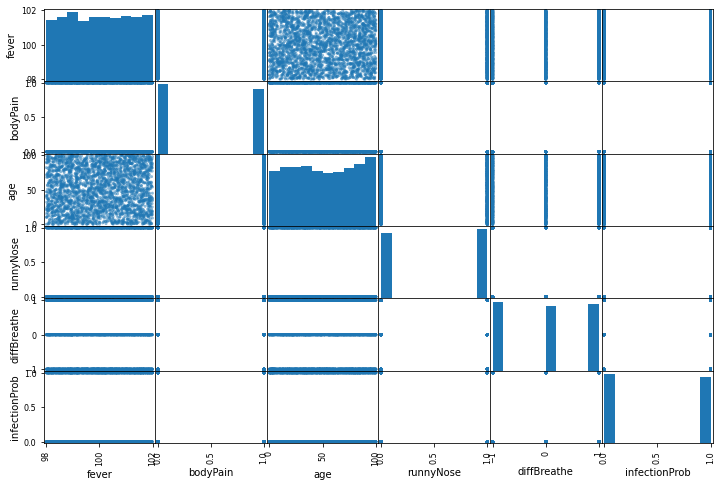

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(covid_data, figsize=(12,8))

<AxesSubplot:xlabel='diffBreathe', ylabel='infectionProb'>

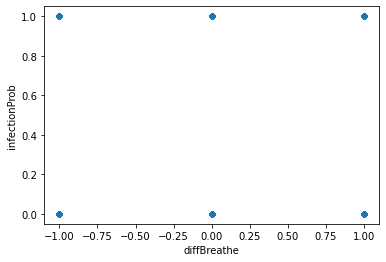

In [24]:
covid_data.plot(kind="scatter", x="diffBreathe", y="infectionProb", alpha=0.9)

<AxesSubplot:xlabel='age', ylabel='infectionProb'>

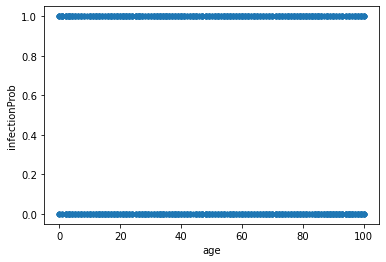

In [25]:
covid_data.plot(kind="scatter", x="age", y="infectionProb", alpha=0.9)

In [26]:
x_train=strat_train_data[['fever','bodyPain','age','runnyNose','diffBreathe']].to_numpy()
x_test=strat_test_data[['fever','bodyPain','age','runnyNose','diffBreathe']].to_numpy()

In [27]:
x_train

array([[101.892533  ,   1.        ,   2.        ,   0.        ,
          1.        ],
       [ 99.63709952,   1.        ,  79.        ,   1.        ,
          0.        ],
       [100.2030071 ,   0.        ,  48.        ,   1.        ,
          0.        ],
       ...,
       [ 99.2092505 ,   1.        ,  36.        ,   1.        ,
          1.        ],
       [ 99.8673615 ,   1.        ,  94.        ,   0.        ,
          1.        ],
       [ 98.39540076,   0.        ,  73.        ,   1.        ,
          1.        ]])

In [28]:
y_train=strat_train_data[['infectionProb']].to_numpy().reshape(2136,)
y_test=strat_test_data[['infectionProb']].to_numpy().reshape(916,)

In [29]:
y_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_predict = clf.predict(x_test)

In [33]:
from sklearn import metrics

In [34]:
cnf_matrix= metrics.confusion_matrix(y_test, y_predict)

In [35]:
cnf_matrix

array([[245, 244],
       [205, 222]], dtype=int64)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))

Accuracy: 0.509825327510917
Precision: 0.47639484978540775
Recall: 0.5199063231850117


In [37]:
inputFeatures = [100,1,21,1,-1]
infProb=clf.predict_proba([inputFeatures])[0][1]

In [38]:
infProb

0.5262510340319032